In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [134]:
concrete_DF=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/concrete.csv')
concrete_DF

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [135]:
concrete_DF.shape

(1030, 9)

In [136]:
concrete_DF.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [137]:
concrete_DF.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

### Exploratory Data Analysis

<AxesSubplot:>

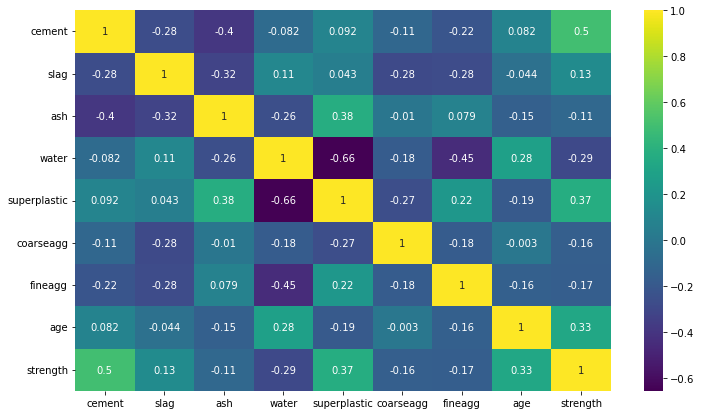

In [138]:
plt.figure(figsize=(12,7))
sns.heatmap(concrete_DF.corr(),annot=True,cmap='viridis')

##### Strength of concrete is positively correlated with cement, slag and super plastic which means increase in these parameters will increase stength of concrete
##### Also Notice that stength is negatively correlated with water,ash,coarseagg so to get better stenght these ingreditnts must be used less.
#### Since correlation between variables are not close to 1 so it is good to not drop any correlated variables.

<AxesSubplot:xlabel='cement', ylabel='strength'>

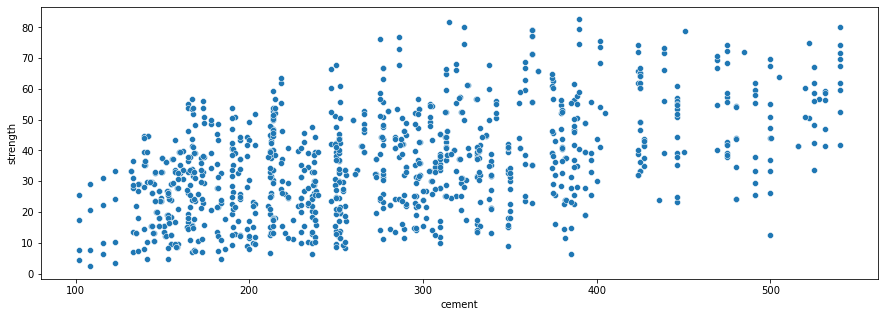

In [139]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='cement',y='strength',data=concrete_DF)

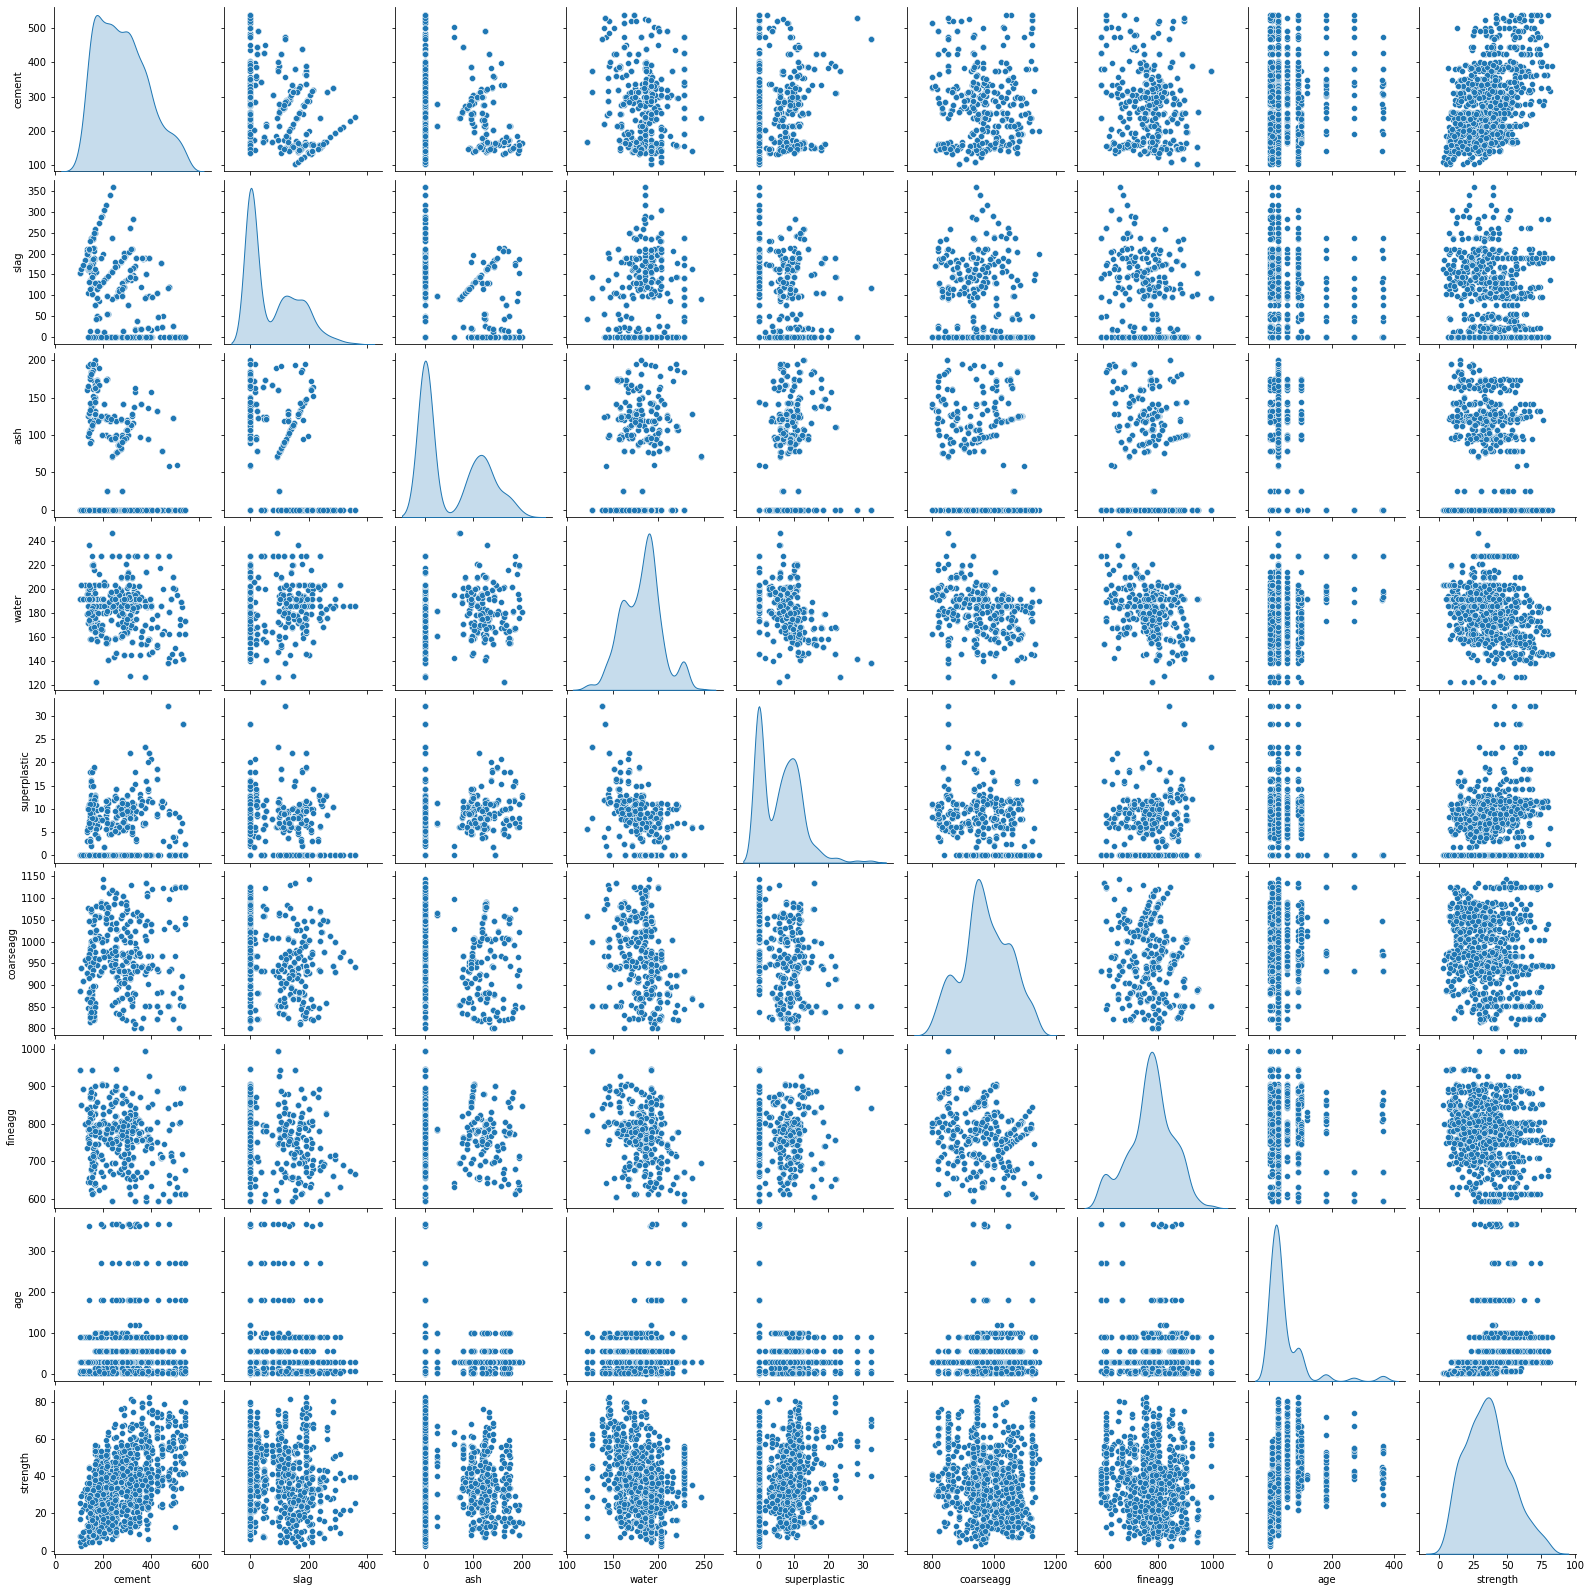

In [140]:
sns.pairplot(concrete_DF,diag_kind='kde')

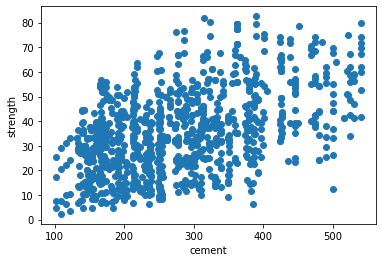

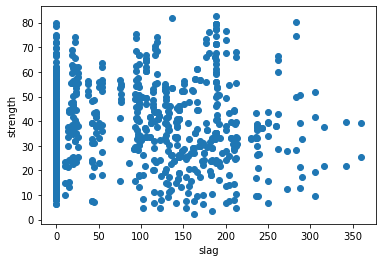

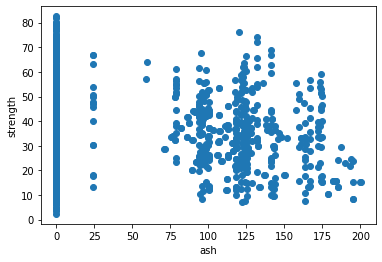

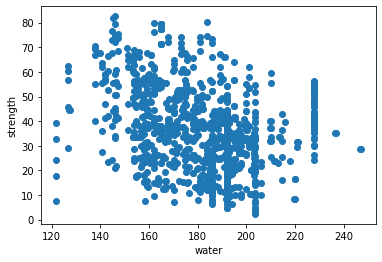

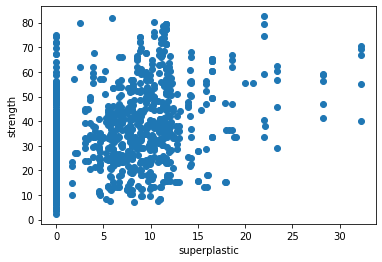

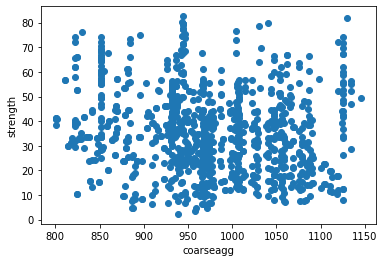

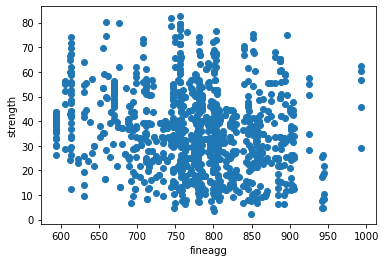

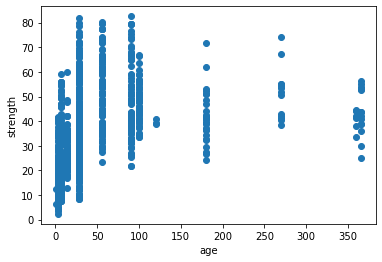

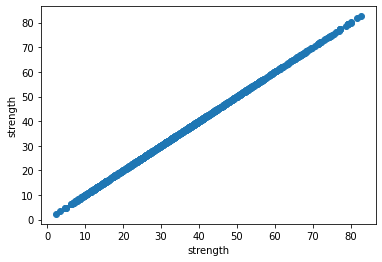

In [141]:
for feature in concrete_DF.columns:
    plt.scatter(concrete_DF[feature],concrete_DF.iloc[:, -1])
    plt.xlabel(feature)
    plt.ylabel('strength')
    plt.show()

In [142]:
for feature in concrete_DF.columns:
    print(f"{feature} ---- {concrete_DF.duplicated(feature).sum()}")

cement ---- 752
slag ---- 845
ash ---- 874
water ---- 835
superplastic ---- 919
coarseagg ---- 746
fineagg ---- 728
age ---- 1016
strength ---- 185


#### These are duplicate values in the dataset so it would be better to remove all those duplicated values otherwise our modle may get biased toward these particular values and also will consume unnecessary time to perform.

In [143]:
duplicates=concrete_DF.duplicated()
concrete_DF[duplicates]
duplicates.value_counts()

False    1005
True       25
dtype: int64

In [144]:
concrete_DF.drop_duplicates()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


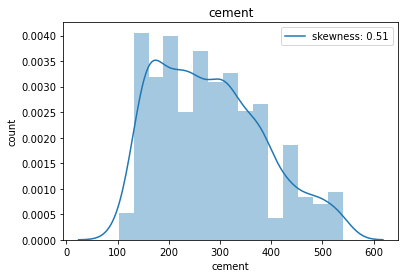

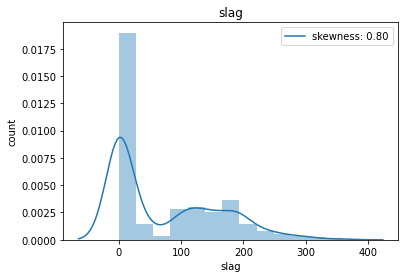

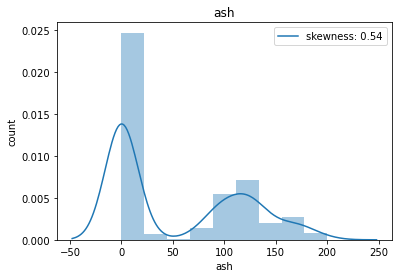

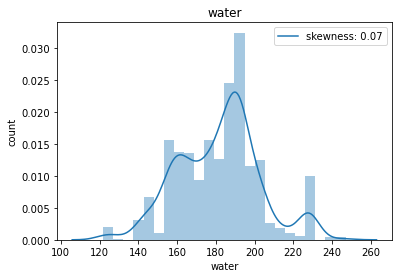

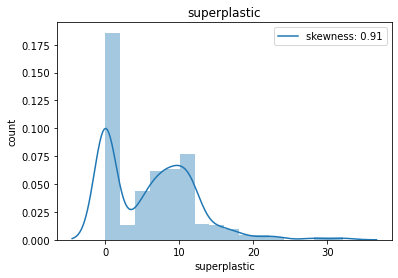

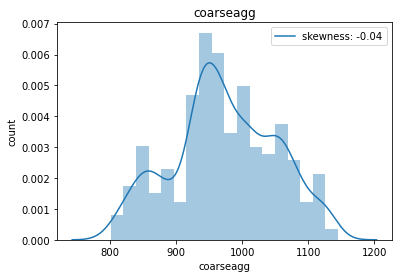

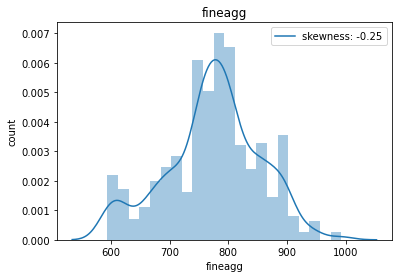

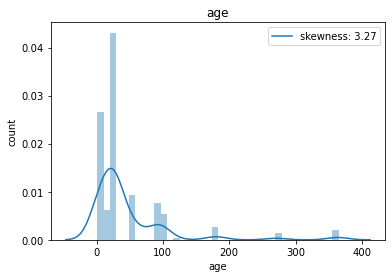

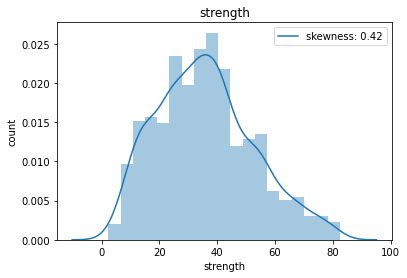

In [145]:
for feature in concrete_DF.columns: 
    data=concrete_DF.copy()
    bar=sns.distplot(data[feature])
    bar.legend(['skewness: {:.2f}'.format(data[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

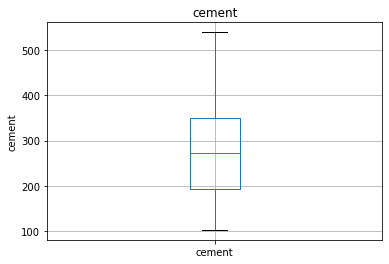

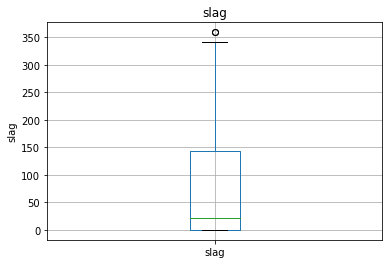

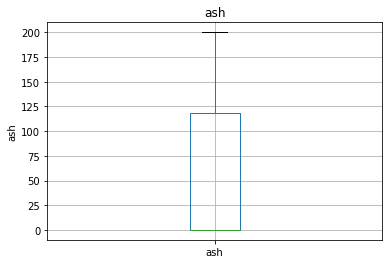

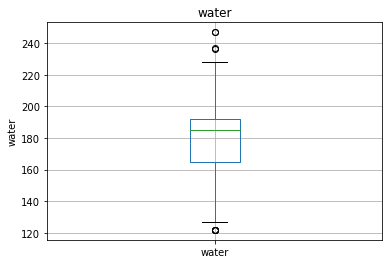

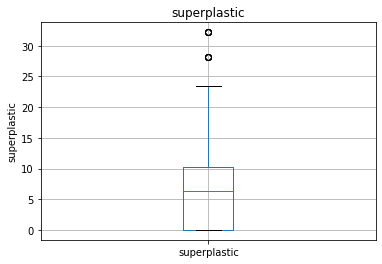

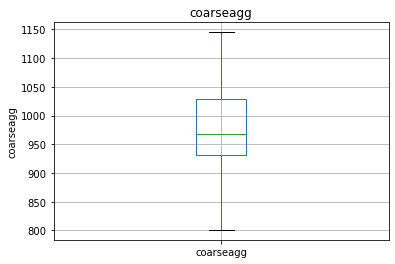

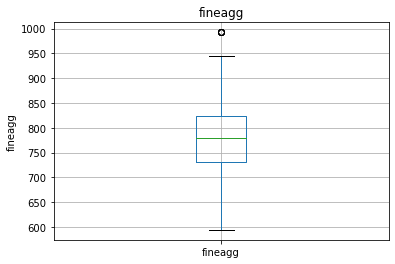

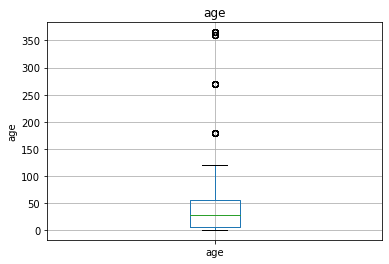

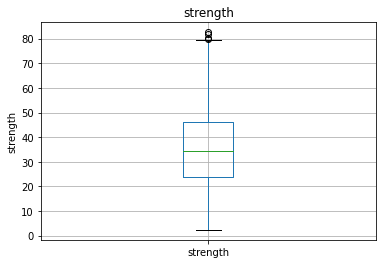

In [146]:
for feature in concrete_DF.columns:
    data=concrete_DF.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [147]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range
from sklearn.datasets import load_boston

In [148]:
lowwater,uppwater = remove_outlier(concrete_DF['water'])
concrete_DF['water']=np.where(concrete_DF['water']>uppwater,uppwater,concrete_DF['water'])
concrete_DF['water']=np.where(concrete_DF['water']<lowwater,lowwater,concrete_DF['water'])

<AxesSubplot:>

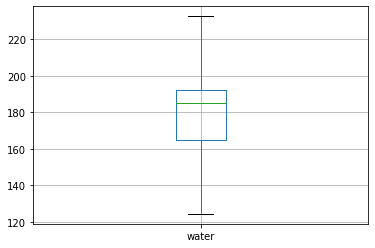

In [149]:
concrete_DF.boxplot(column=['water'])

In [150]:
lowslag,uppslag = remove_outlier(concrete_DF['slag'])
concrete_DF['slag']=np.where(concrete_DF['slag']>uppslag,uppslag,concrete_DF['slag'])
concrete_DF['slag']=np.where(concrete_DF['slag']<lowslag,lowslag,concrete_DF['slag'])

<AxesSubplot:>

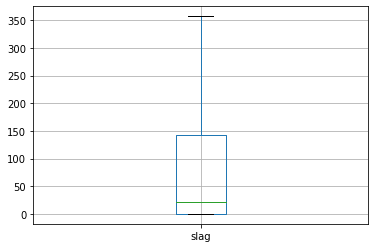

In [151]:
concrete_DF.boxplot(column=['slag'])

In [152]:
lowsuperplastic,uppsuperplastic = remove_outlier(concrete_DF['superplastic'])
concrete_DF['superplastic']=np.where(concrete_DF['superplastic']>uppsuperplastic,uppsuperplastic,concrete_DF['superplastic'])
concrete_DF['superplastic']=np.where(concrete_DF['superplastic']<lowsuperplastic,lowsuperplastic,concrete_DF['superplastic'])

<AxesSubplot:>

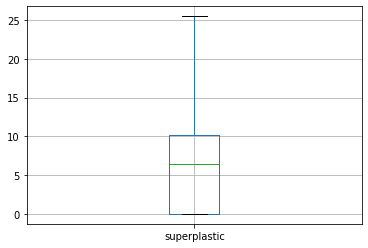

In [153]:
concrete_DF.boxplot(column=['superplastic'])

In [154]:
lowfineagg,uppfineagg = remove_outlier(concrete_DF['fineagg'])
concrete_DF['fineagg']=np.where(concrete_DF['fineagg']>uppfineagg,uppfineagg,concrete_DF['fineagg'])
concrete_DF['fineagg']=np.where(concrete_DF['fineagg']<lowfineagg,lowfineagg,concrete_DF['fineagg'])

<AxesSubplot:>

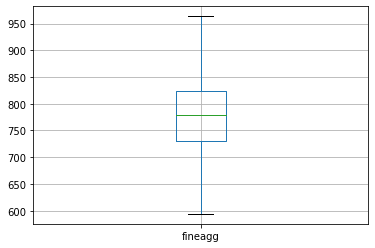

In [155]:
concrete_DF.boxplot(column=['fineagg'])

In [156]:
lowstr,uppstr = remove_outlier(concrete_DF['strength'])
concrete_DF['strength']=np.where(concrete_DF['strength']>uppstr,uppstr,concrete_DF['strength'])
concrete_DF['strength']=np.where(concrete_DF['strength']<lowstr,lowstr,concrete_DF['strength'])

<AxesSubplot:>

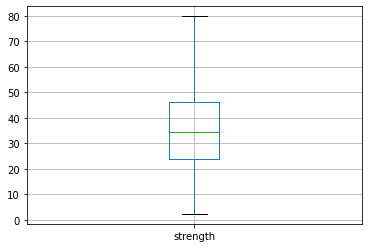

In [157]:
concrete_DF.boxplot(column=['strength'])

In [158]:
Data=concrete_DF.copy()
Data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,25.5,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [159]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()

In [160]:
concrete_DF['cement'] =normalize.fit_transform(concrete_DF[['cement']])
concrete_DF['slag'] =normalize.fit_transform(concrete_DF[['slag']])
concrete_DF['ash'] =normalize.fit_transform(concrete_DF[['ash']])
concrete_DF['water'] =normalize.fit_transform(concrete_DF[['water']])
concrete_DF['superplastic'] =normalize.fit_transform(concrete_DF[['superplastic']])
concrete_DF['coarseagg'] =normalize.fit_transform(concrete_DF[['coarseagg']])
concrete_DF['fineagg'] =normalize.fit_transform(concrete_DF[['fineagg']])
concrete_DF['age'] =normalize.fit_transform(concrete_DF[['age']])

In [161]:
concrete_DF.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.089726,0.593214,0.000000,0.731089,0.000000,0.496512,0.418048,0.074176,29.89
1,0.152740,0.118083,0.621189,0.314114,0.423529,0.813372,0.547115,0.035714,23.51
2,0.337900,0.000000,0.478261,0.582565,0.215686,0.453198,0.722993,0.074176,29.22
3,0.374429,0.318993,0.000000,0.957103,0.000000,0.380814,0.205642,0.074176,45.85
4,0.120548,0.513186,0.000000,0.636993,0.356863,0.716279,0.277887,0.074176,18.29
5,0.349315,0.000000,0.000000,0.625000,0.000000,0.258140,0.949740,0.244505,21.86
6,0.147945,0.700105,0.000000,0.731089,0.000000,0.507558,0.266793,0.016484,15.75
7,0.341096,0.000000,0.591204,0.592712,0.250980,0.661047,0.442941,0.151099,36.64
8,0.442922,0.000000,0.000000,0.625000,0.000000,0.825581,0.462694,0.074176,21.65
9,0.121005,0.514865,0.714643,0.643450,0.352941,0.229651,0.284110,0.074176,28.99


In [162]:
X=concrete_DF.drop(['strength'],axis=1)
y=concrete_DF['strength']

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [164]:
reg=LinearRegression(fit_intercept=False)
reg.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [165]:
reg.score(X_train,y_train)

0.6149275002692867

In [166]:
reg.score(X_test,y_test)

0.6220598167083863

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
fit=lr.fit(X_train,y_train)
score = lr.score(X_test,y_test)
print('predcted score is : {}'.format(score))
print('..................................')
y_predict = lr.predict(X_test)
print('mean_sqrd_error is ==',mean_squared_error(y_test,y_predict))
rms = np.sqrt(mean_squared_error(y_test,y_predict)) 
print('root mean squared error is == {}'.format(rms))

predcted score is : 0.6221797850496714
..................................
mean_sqrd_error is == 102.74500402094523
root mean squared error is == 10.136321029887778


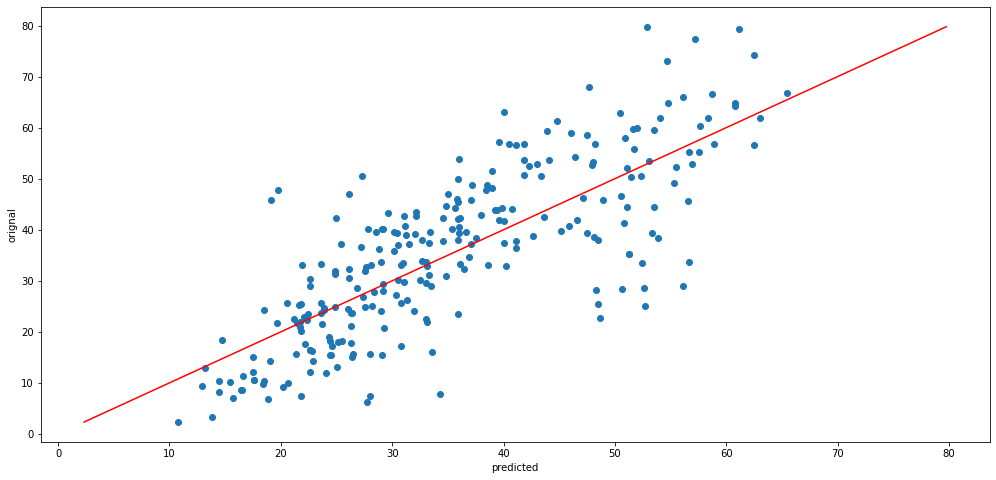

In [168]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [169]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
rd= Ridge(alpha=0.4)
ls= Lasso(alpha=0.3)
fit_rd=rd.fit(X_train,y_train)
fit_ls = ls.fit(X_train,y_train)
print('score od ridge regression is:-',rd.score(X_test,y_test))
print('.......................................................')
print('score of lasso is:-',ls.score(X_test,y_test))
print('mean_sqrd_roor of ridig is==',mean_squared_error(y_test,rd.predict(X_test)))
print('mean_sqrd_roor of lasso is==',mean_squared_error(y_test,ls.predict(X_test)))
print('root_mean_squared error of ridge is==',np.sqrt(mean_squared_error(y_test,rd.predict(X_test))))
print('root_mean_squared error of lasso is==',np.sqrt(mean_squared_error(y_test,lr.predict(X_test))))

score od ridge regression is:- 0.6197978023001356
.......................................................
score of lasso is:- 0.5351619680619866
mean_sqrd_roor of ridig is== 103.39276403349791
mean_sqrd_roor of lasso is== 126.40876155035369
root_mean_squared error of ridge is== 10.168223248606312
root_mean_squared error of lasso is== 10.136321029887778


In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rnd= RandomForestRegressor(ccp_alpha=0.0,n_estimators=11,random_state=0,max_depth=1000,bootstrap=True,min_samples_leaf=1)
fit_rnd= rnd.fit(X_train,y_train)
print('score is:-',rnd.score(X_test,y_test))
print('........................................')
print('mean_sqrd_error is==',mean_squared_error(y_test,rnd.predict(X_test)))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,rnd.predict(X_test))))

score is:- 0.9108569080059011
........................................
mean_sqrd_error is== 24.241708047774257
root_mean_squared error of is== 4.923586908725615


In [171]:
rnd.score(X_train,y_train)

0.9771025213086899

In [172]:
rnd.score(X_test,y_test)

0.9108569080059011

In [173]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly=PolynomialFeatures(degree=3,interaction_only=False,
    include_bias=True,
    order='C')
x_train2=poly.fit_transform(X_train)
x_test2 = poly.fit_transform(X_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)
print(poly_clf.score(x_train2,y_train))


0.9328671861481697


In [174]:
poly_clf.score(x_test2,y_test)

0.8309687034478092

In [175]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt


In [176]:
from sklearn.neighbors import KNeighborsRegressor

In [177]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  

In [178]:
for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

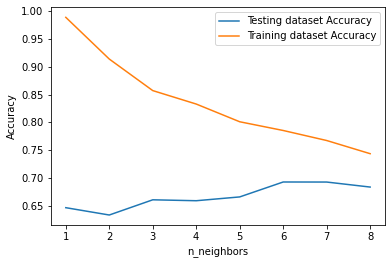

In [179]:
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

#### The testing accuracy and training accuracy is going to intersect for more than 8 neighbors. so we checked for greater than 8 values and found good accuracy for 9 neigbhbors

In [180]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [181]:
knn.score(X_train,y_train)

0.7297544353301988

In [182]:
knn.score(X_test,y_test)

0.6712996345811257

In [183]:
from sklearn.svm import SVR

In [184]:
svr_reg=SVR(kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.01,
    tol=0.001,
    C=1.0,
    epsilon=0.001,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1)
svr_reg.fit(X_train,y_train)

SVR(coef0=0.01, epsilon=0.001)

In [185]:
svr_reg.score(X_train,y_train)

0.6093416982323476

In [186]:
svr_reg.score(X_test,y_test)

0.5984823218599344

In [187]:
from sklearn.tree import DecisionTreeRegressor 

In [188]:
DT_reg=DecisionTreeRegressor (random_state=5,criterion='friedman_mse',min_samples_split=23,splitter='best')
DT_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=23,
                      random_state=5)

In [189]:
DT_reg.score(X_train,y_train)

0.9099434278769063

In [190]:
DT_reg.score(X_test,y_test)

0.8507922452001093

In [191]:
import scipy.stats as stat
import pylab

#### After performing various algorithms it is found that Polynomial Regression has very high performance followed by  RandomForest Regressor but it is overfitting. Also performance of DecisionTree Regressor is good on both Train and Test data.

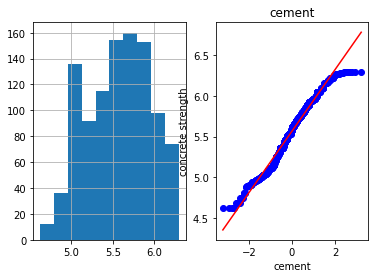

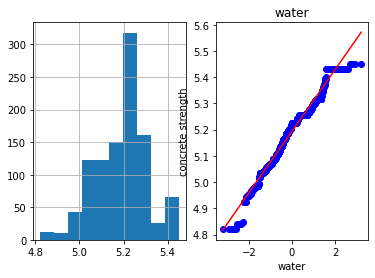

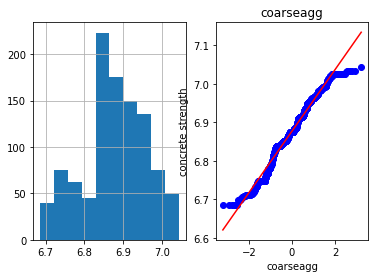

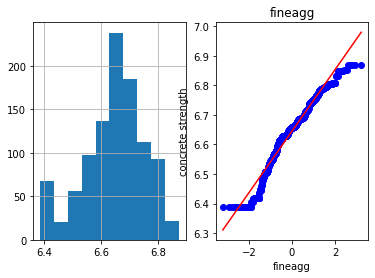

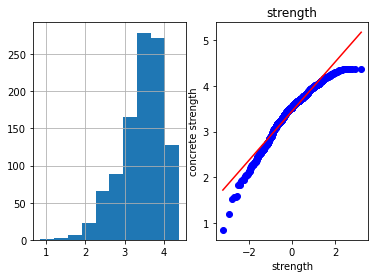

In [193]:
#Log Transformation
for feature in Data.columns:
    df=Data.copy()
    if 0 in df[feature].unique():
        pass
    elif feature=='age':
        pass
    else:
        df[feature]=np.log(df[feature])
        plt.subplot(1,2,1)
        df[feature].hist()
        plt.subplot(1,2,2)
        stat.probplot(df[feature],dist='norm',plot=pylab)
        plt.xlabel(feature)
        plt.ylabel('concrete strength')
        plt.title(feature)
        plt.show()

In [194]:
X=data.iloc[:, : -1]
y=data.iloc[:, -1]
X

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28
...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270


In [195]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-1.33901711,  1.60144087, -0.84714393, ..., -0.01439767,
        -0.31296991, -0.27973311],
       [-1.07479007, -0.36754132,  1.09607803, ...,  1.38814131,
         0.28226038, -0.50146528],
       [-0.29838379, -0.85688789,  0.64896501, ..., -0.20612089,
         1.09337085, -0.27973311],
       ...,
       [-0.04564488,  0.4882354 ,  0.56454507, ..., -1.32300514,
        -0.06589318, -0.27973311],
       [ 0.58237302, -0.41624406, -0.84714393, ..., -0.52651741,
        -1.29254178,  3.55306569],
       [ 2.47791487, -0.85688789, -0.84714393, ...,  1.9568773 ,
        -2.00382326, -0.61233136]])

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=5)

In [197]:
poly=PolynomialFeatures(degree=3,interaction_only=False,
    include_bias=True,
    order='C')
x_train2=poly.fit_transform(X_train)
x_test2 = poly.fit_transform(X_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)
print(poly_clf.score(x_train2,y_train))

0.9319159110455324


In [198]:
poly_clf.score(x_test2,y_test)

0.864975956262005

In [199]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [200]:
for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

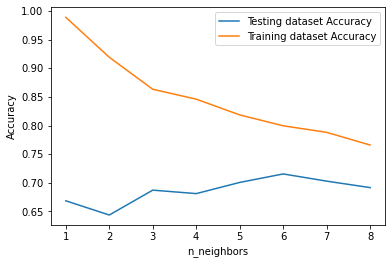

In [201]:
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [202]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [203]:
knn.score(X_train,y_train)

0.7490204362020398

In [204]:
knn.score(X_test,y_test)

0.6832693965270167

In [205]:
svr_reg=SVR(kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.01,
    tol=0.001,
    C=1.0,
    epsilon=0.001,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1)
svr_reg.fit(X_train,y_train)

SVR(coef0=0.01, epsilon=0.001)

In [206]:
svr_reg.score(X_train,y_train)

0.6549142534660304

In [207]:
svr_reg.score(X_test,y_test)

0.6494635651113921

In [208]:
DT_reg=DecisionTreeRegressor (random_state=5,criterion='friedman_mse',min_samples_split=23,splitter='best')
DT_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=23,
                      random_state=5)

In [209]:
DT_reg.score(X_train,y_train)

0.9097767390104743

In [210]:
DT_reg.score(X_test,y_test)

0.8456908480127542

In [211]:
rd= Ridge(alpha=0.4)
ls= Lasso(alpha=0.3)
fit_rd=rd.fit(X_train,y_train)
fit_ls = ls.fit(X_train,y_train)
print('score od ridge regression is:-',rd.score(X_test,y_test))
print('.......................................................')
print('score of lasso is:-',ls.score(X_test,y_test))
print('mean_sqrd_roor of ridig is==',mean_squared_error(y_test,rd.predict(X_test)))
print('mean_sqrd_roor of lasso is==',mean_squared_error(y_test,ls.predict(X_test)))
print('root_mean_squared error of ridge is==',np.sqrt(mean_squared_error(y_test,rd.predict(X_test))))
print('root_mean_squared error of lasso is==',np.sqrt(mean_squared_error(y_test,lr.predict(X_test))))

score od ridge regression is:- 0.621645432544668
.......................................................
score of lasso is:- 0.612084034849279
mean_sqrd_roor of ridig is== 102.9185641030386
mean_sqrd_roor of lasso is== 105.5194189790504
root_mean_squared error of ridge is== 10.14487871307679
root_mean_squared error of lasso is== 61.72881121096868


In [212]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rnd= RandomForestRegressor(ccp_alpha=0.0,n_estimators=10000,random_state=0,max_depth=10000,bootstrap=True,min_samples_leaf=1,max_features='auto',verbose=0)
fit_rnd= rnd.fit(X_train,y_train)
print('score is:-',rnd.score(X_test,y_test))
print('........................................')
print('mean_sqrd_error is==',mean_squared_error(y_test,rnd.predict(X_test)))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,rnd.predict(X_test))))

score is:- 0.9128090318810127
........................................
mean_sqrd_error is== 23.71735407322497
root_mean_squared error of is== 4.870046619204478


#### Notice that before log transformation the accuracy of RandomForest was 0.91 with error 4.92. Log transformation and standardization has helped to increase the accuracy and decrease error.